In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
splits_root = r"E:\Skripsi\DEC\dataset\ae-supervised-dataset\split-spectograms"
train_csv = os.path.join(splits_root, "train_latent.csv")
test_csv  = os.path.join(splits_root, "test_latent.csv")


train_df = pd.read_csv(train_csv)
test_df  = pd.read_csv(test_csv)

In [3]:
y_train = train_df["label"].values
y_test  = test_df["label"].values

X_train = train_df.drop(columns=["filename","label"]).values
X_test  = test_df.drop(columns=["filename","label"]).values

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

Improvement pada Weight tiap kelas, akurasi berkurang dari 74 - 72

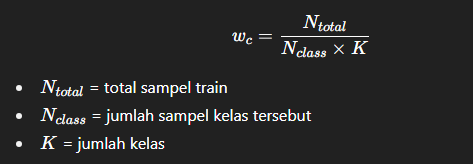

In [ ]:
# class_counts = np.bincount(y_train_enc)
# n_total = len(y_train_enc)
# n_classes = len(class_counts)

# # Bobot kelas
# class_weights = {i: n_total / (count * n_classes) for i, count in enumerate(class_counts)}
# print("Class Weights:", class_weights)

# # Buat sample_weight sesuai label
# sample_weights = np.array([class_weights[label] for label in y_train_enc])


Class Weights: {0: np.float64(3.1518367346938776), 1: np.float64(0.782370820668693), 2: np.float64(0.45964285714285713), 3: np.float64(0.9010501750291715), 4: np.float64(8.393478260869566)}


In [ ]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="gpu_hist",   
    eval_metric="mlogloss",
    objective="multi:softprob",
    num_class=len(np.unique(y_train_enc)),
    random_state=42
)

model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_test, y_test_enc)],
          verbose=True)

[0]	validation_0-mlogloss:1.52864	validation_1-mlogloss:1.53408


e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\training.py:183: UserWarning: [18:56:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\training.py:183: UserWarning: [18:56:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[1]	validation_0-mlogloss:1.45702	validation_1-mlogloss:1.46800
[2]	validation_0-mlogloss:1.39154	validation_1-mlogloss:1.40727
[3]	validation_0-mlogloss:1.33103	validation_1-mlogloss:1.35168
[4]	validation_0-mlogloss:1.27627	validation_1-mlogloss:1.30120
[5]	validation_0-mlogloss:1.22489	validation_1-mlogloss:1.25550
[6]	validation_0-mlogloss:1.17788	validation_1-mlogloss:1.21246
[7]	validation_0-mlogloss:1.13371	validation_1-mlogloss:1.17301
[8]	validation_0-mlogloss:1.09205	validation_1-mlogloss:1.13733
[9]	validation_0-mlogloss:1.05418	validation_1-mlogloss:1.10385
[10]	validation_0-mlogloss:1.01792	validation_1-mlogloss:1.07266
[11]	validation_0-mlogloss:0.98355	validation_1-mlogloss:1.04311
[12]	validation_0-mlogloss:0.95141	validation_1-mlogloss:1.01529
[13]	validation_0-mlogloss:0.92103	validation_1-mlogloss:0.98891
[14]	validation_0-mlogloss:0.89294	validation_1-mlogloss:0.96471
[15]	validation_0-mlogloss:0.86643	validation_1-mlogloss:0.94155
[16]	validation_0-mlogloss:0.84117

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\core.py:2676: UserWarning: [18:36:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:



Classification Report:
              precision    recall  f1-score   support

    GASBURST       0.31      0.08      0.13        61
          MP       0.68      0.70      0.69       247
    ROCKFALL       0.96      0.96      0.96       421
         VTA       0.63      0.76      0.69       214
         VTB       1.00      0.87      0.93        23

    accuracy                           0.79       966
   macro avg       0.72      0.67      0.68       966
weighted avg       0.78      0.79      0.78       966



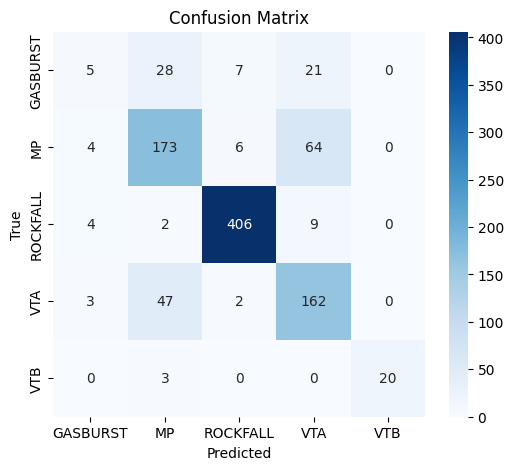

In [13]:
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Perbaiki GASBURST vs VTA

Tambah data GASBURST (augmentasi, synthetic oversampling, atau SMOTE di latent space).

Atau ganti loss fungsi AE ke contrastive loss / triplet loss supaya latent space lebih separable.

Latent dimension

Sekarang latent_dim = 128 → bisa coba naik ke 256 agar lebih banyak informasi tertangkap.

Class balancing di XGBoost

Tambahkan scale_pos_weight atau pakai class_weight="balanced" agar model tidak mengabaikan kelas kecil.

Feature fusion

Selain latent dari AE, coba tambahkan handcrafted features (RMS, spectral centroid, kurtosis, dll) untuk membantu GASBURST.